In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df1=pd.read_csv('credit_train.csv')
pd.options.display.max_colwidth =500
pd.options.display.max_rows =500
df1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df1.shape

(100514, 19)

In [7]:
df2=pd.read_csv('credit_test.csv')
pd.options.display.max_colwidth =500
pd.options.display.max_rows =500
df2.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [8]:
df2.shape

(10353, 18)

In [9]:
df1.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

### Treatment of Features

In [11]:
# These two features are only for identification.Hence dropping these . 
df1.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [12]:
#Calculating missing values by column
mis_val = df1.isnull().sum()
mis_val_percent = 100 * (df1.isnull().sum() / len(df1))
# Making a table with the results
mis_val_df = pd.concat([mis_val, mis_val_percent], axis=1 )
mis_val_df.rename(columns = {0:'Missing_Count',1:'Percentage'}, inplace = True)
mis_val_df

,Missing_Count,Percentage
Loan Status,514,0.511372
Current Loan Amount,514,0.511372
Term,514,0.511372
Credit Score,19668,19.567423
Annual Income,19668,19.567423
Years in current job,4736,4.711781
Home Ownership,514,0.511372
Purpose,514,0.511372
Monthly Debt,514,0.511372
Years of Credit History,514,0.511372


In [13]:
# Drop the columns with > 50% missing
df1.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [14]:
# Checking the 514 observations which are NaN values.
df1[df1['Years of Credit History'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Dropping the NaNs
df1.drop(df1.tail(514).index, inplace=True) # drop last 514 rows

In [16]:
#Checking the missing values Now 
df1.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [17]:
df1.shape

(100000, 16)

#### Treating the Maximum Open Credit feature 

In [18]:
indexNames = df1[df1['Maximum Open Credit'].isnull()==True].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

In [19]:
df1.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19153
Annual Income                19153
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                   204
Tax Liens                       10
dtype: int64

#### Treating the Tax Liens column 

In [20]:
indexNames = df1[df1['Tax Liens'].isnull()==True].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

In [21]:
df1.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19149
Annual Income                19149
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                   194
Tax Liens                        0
dtype: int64

#### Treating the Bankruptcies column

In [22]:
indexNames = df1[df1['Bankruptcies'].isnull()==True].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

In [23]:
df1.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19111
Annual Income                19111
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

#### Treating further columns with NaNs  

In [24]:
df1['Annual Income']

0        1167493.0
1              NaN
2        2231892.0
3         806949.0
4              NaN
           ...    
99995     475437.0
99996    1289416.0
99997    1150545.0
99998    1717524.0
99999     935180.0
Name: Annual Income, Length: 99794, dtype: float64

In [25]:
df1['Credit Score']

0        709.0
1          NaN
2        741.0
3        721.0
4          NaN
         ...  
99995    725.0
99996    732.0
99997    742.0
99998    746.0
99999    743.0
Name: Credit Score, Length: 99794, dtype: float64

In [26]:
indexNames = df1[df1['Annual Income'].isnull()==True].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

In [27]:
indexNames = df1[df1['Credit Score'].isnull()==True].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

In [28]:
#Converting the data types to Flaot 
df1['Annual Income']=df1['Annual Income'].astype('float')
df1['Credit Score']=df1['Credit Score'].astype('float')

In [29]:
df1.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         3412
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

#### Treating the anamolies in Credit_score column 

In [30]:
df1['Credit Score']=df1['Credit Score'].astype('str')

In [31]:
df1['Credit Score']=df1['Credit Score'].str.slice(start=0,stop=3)

In [32]:
df1['Credit Score']=df1['Credit Score'].astype('float')

#### Checking the mode of Years in current job to impute 

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

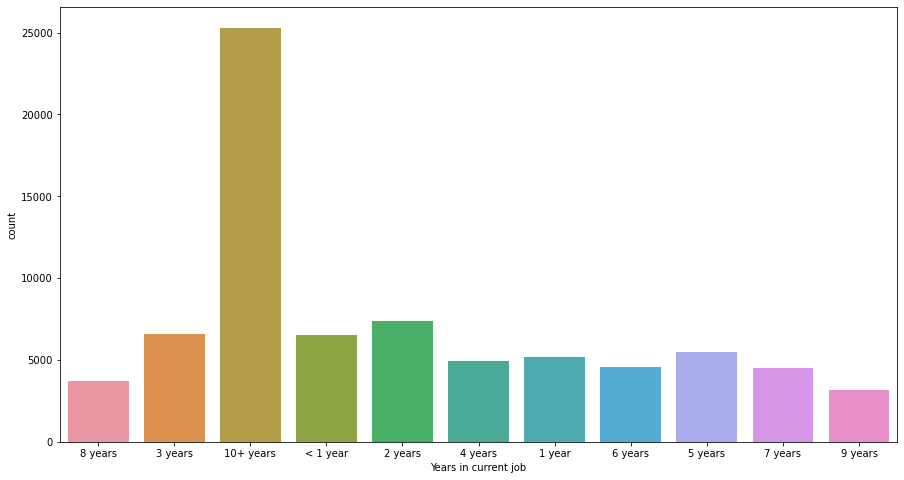

In [33]:
plt.figure(figsize=(15,8))

sns.countplot(df1['Years in current job'])


###### It is evident that the maximum frequency of the Number of Years is 10+ Years 

In [34]:
#Filling the NaNs with Mode of the column
df1.fillna('10+ years', inplace=True) 

In [35]:
df1.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

#### Categorizing Years in current job into 3 Classes 

In [36]:
df1['Years in current job'].value_counts()

10+ years    28713
2 years       7363
3 years       6605
< 1 year      6529
5 years       5465
1 year        5155
4 years       4908
6 years       4567
7 years       4506
8 years       3701
9 years       3171
Name: Years in current job, dtype: int64

###### Entry Level -
< 1 year,
 1 year,
 2 years,
 3 years,

##### Mid-Level -
 4 years,
 5 years,
 6 years,
 7 years,
 8 years,
 9 years,
##### Senior-Level -
10+ years



In [37]:
#Entry_Level Mid_Level and Senior_Level encoding
df1['Years in current job']=df1['Years in current job'].replace({'< 1 year':'Entry_Level','1 year':'Entry_Level','2 years':'Entry_Level','3 years':'Entry_Level','4 years':'Mid_Level','5 years':'Mid_Level','6 years':'Mid_Level','7 years':'Mid_Level','8 years':'Mid_Level','9 years':'Mid_Level','10+ years':'Senior_Level'})


In [38]:
df1['Years in current job'].value_counts()

Senior_Level    28713
Mid_Level       26318
Entry_Level     25652
Name: Years in current job, dtype: int64

#### Plotting the pairplot to get a better visualisation 

In [39]:
#plt.figure(figsize=(15,8))
#sns.pairplot(df1)

In [40]:
df1.shape

(80683, 16)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80683 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                80683 non-null  object 
 1   Current Loan Amount        80683 non-null  float64
 2   Term                       80683 non-null  object 
 3   Credit Score               80683 non-null  float64
 4   Annual Income              80683 non-null  float64
 5   Years in current job       80683 non-null  object 
 6   Home Ownership             80683 non-null  object 
 7   Purpose                    80683 non-null  object 
 8   Monthly Debt               80683 non-null  float64
 9   Years of Credit History    80683 non-null  float64
 10  Number of Open Accounts    80683 non-null  float64
 11  Number of Credit Problems  80683 non-null  float64
 12  Current Credit Balance     80683 non-null  float64
 13  Maximum Open Credit        80683 non-null  flo

In [42]:
df1.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

##### Checking the Balance of the Dataset on the Basis of the Target Column (Loan_Status)

In [43]:
df1['Loan Status'].value_counts(normalize=True)*100

Fully Paid     78.717946
Charged Off    21.282054
Name: Loan Status, dtype: float64

In [44]:
#Checking Skewness 

In [45]:
df1.skew()

Current Loan Amount            2.051210
Credit Score                  -1.337833
Annual Income                 47.026121
Monthly Debt                   2.334635
Years of Credit History        1.069628
Number of Open Accounts        1.194882
Number of Credit Problems      4.935781
Current Credit Balance        15.494395
Maximum Open Credit          165.781068
Bankruptcies                   3.531020
Tax Liens                     15.758849
dtype: float64

##### We can see the Dataset is moderately imabalanced towards Fully Paid and Hence Sampling techniques to reduce Imabalance would be used 

### EDA

In [46]:
df1_cat=df1.select_dtypes('object')
df1_num=df1.select_dtypes(np.number)

In [47]:
df1_cat

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,Mid_Level,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,Mid_Level,Own Home,Debt Consolidation
3,Fully Paid,Long Term,Entry_Level,Own Home,Debt Consolidation
5,Charged Off,Short Term,Senior_Level,Home Mortgage,Debt Consolidation
6,Fully Paid,Short Term,Entry_Level,Home Mortgage,Debt Consolidation
...,...,...,...,...,...
99995,Fully Paid,Short Term,Mid_Level,Own Home,other
99996,Fully Paid,Short Term,Entry_Level,Rent,Debt Consolidation
99997,Fully Paid,Short Term,Mid_Level,Rent,Debt Consolidation
99998,Fully Paid,Short Term,Mid_Level,Rent,Debt Consolidation


#### Data Insight Analysis :Checking loan_status and Terms for the Loan

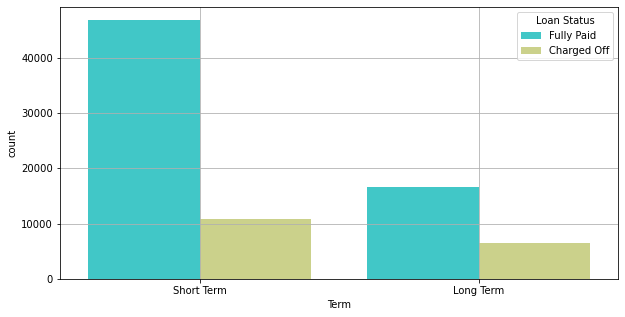

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='Term',hue='Loan Status',data=df1_cat,palette='rainbow')
plt.grid()
plt.show()


#### We can clearly see that the data is imbalanced upon the target class (Loan_status) for both Short and Long Term Loan applications . This will be treated in further analysis

### Insight Analysis : Understanding the Loan term and Years of Experience of the Applicants

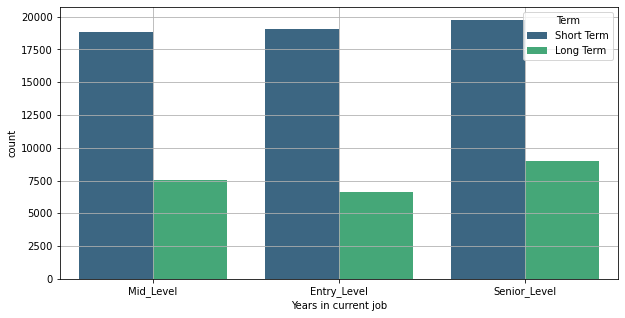

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='Years in current job',hue='Term',data=df1_cat,palette='viridis')
plt.grid()
plt.show()


#### We can infer that almost all classes had equally Applied for both Short and Long term Loans . Short_Term Loan having the maximum applicants 

### Insight Analysis : Checking the Ownership and Years of Experience of the Applicant

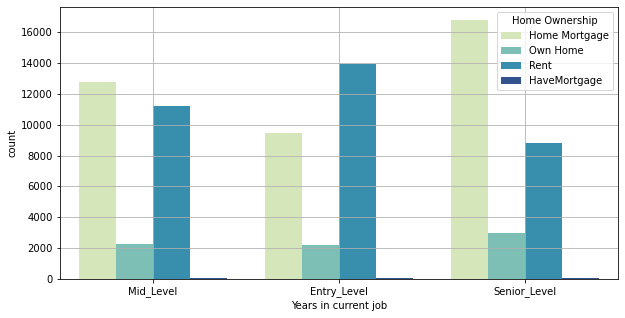

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='Years in current job',hue='Home Ownership',data=df1_cat,palette='YlGnBu')
plt.grid()
plt.show()


#### We can infer that Senior_level Employees had the highest Home Mortgage and HaveMortgage being the lowest Ownership . 

### Business Problem: Understanding the Purpose of the loan and the term 

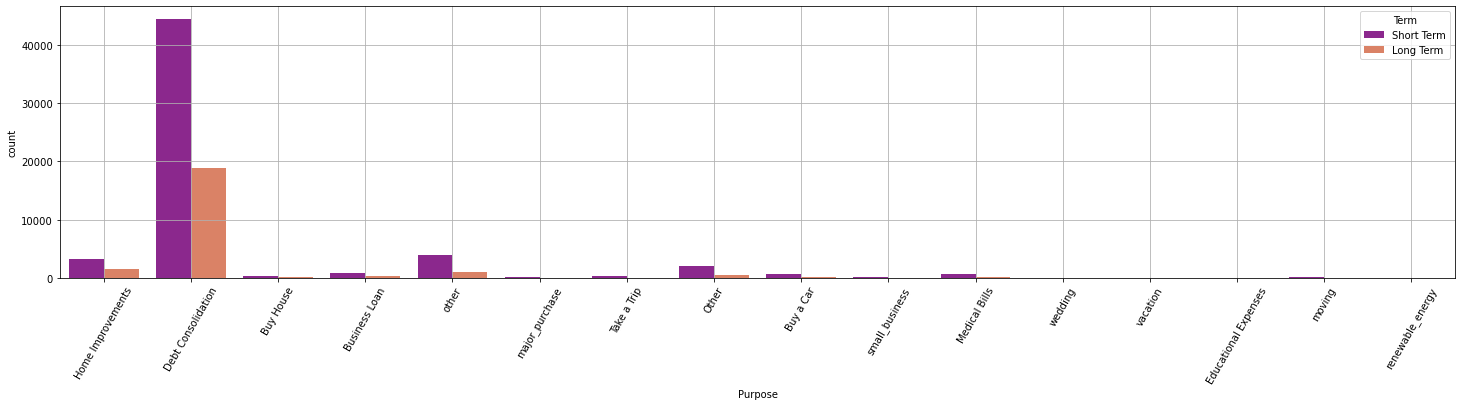

In [51]:
plt.figure(figsize=(25,5))
sns.countplot(x='Purpose',hue='Term',data=df1_cat,palette='plasma')
plt.xticks(rotation=60)
plt.grid()
plt.show()

#### We can infer that Loan were applied to clear off old Debts for both Short and Long Term types

### EDA Numerical Features 

In [52]:
df1_num.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,206602.0,729.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,217646.0,730.0,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


### Insight Analysis : Number of  Credit Score and Annual Income of Applicants

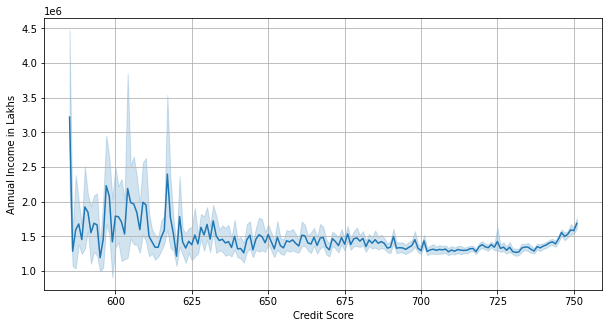

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Credit Score',y='Annual Income',data=df1_num,markers='o',palette='twilight_shifted')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income in Lakhs')
plt.grid()
plt.show()

##### We can infer that Applicants with high Annual had moderately Low Credit Score

### Insight Analysis : Checking the Loan amount applied for and their respective Annual Income 

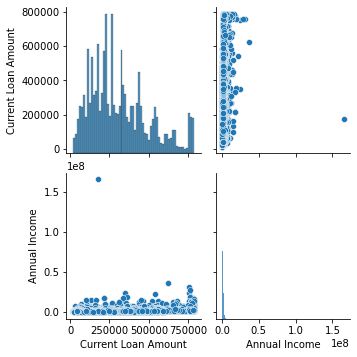

In [54]:
input=df1_num[['Current Loan Amount','Annual Income']]
input=input[input['Current Loan Amount'] !=99999999.0]
sns.pairplot(input)

### Insight Analysis : Checking the Monthly Income vs Monthly Debt 

In [55]:
df1_num['Monthly_Income']=(df1_num['Annual Income']/12)

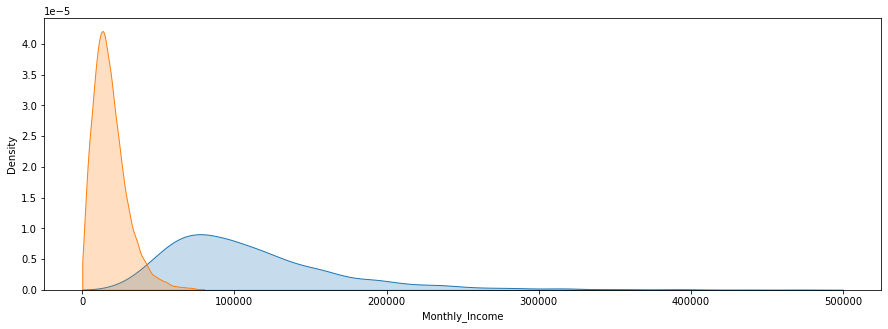

In [56]:
plt.figure(figsize=(15,5))
sns.kdeplot(df1_num['Monthly_Income'],clip=(0,500000),shade=True)
sns.kdeplot(df1_num['Monthly Debt'],clip=(0,80000),shade=True)


plt.show()

##### We can infer that Monthly_Debt and Monthly_Income have different densities .Montly_Income having a higher Mean than the Monthly_Debt

### Insight Analysis : Checking the Credit Problem and Monthly Debt with Loan Status of applicants

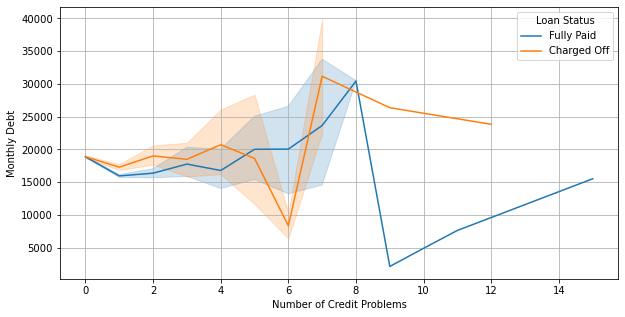

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Number of Credit Problems',y='Monthly Debt',data=df1,hue='Loan Status')
plt.xlabel('Number of Credit Problems')
plt.ylabel('Monthly Debt')
plt.grid()
plt.show()

##### We can Fully_Paid and Charged_off vary highly with Credit Problems and Monhtly Debt

### Insight Analysis: Number of Credit Problems vs Bankruptcy 

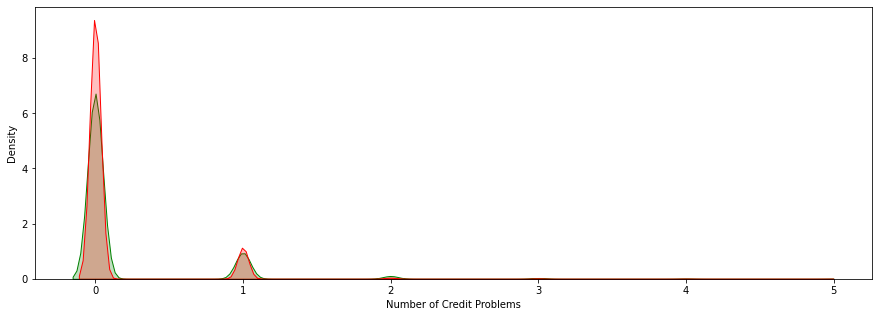

In [58]:
plt.figure(figsize=(15,5))
sns.kdeplot(df1_num['Number of Credit Problems'],clip=(-1,5),shade=True,color='green')
sns.kdeplot(df1_num['Bankruptcies'],clip=(-1,5),shade=True,color='Red')

plt.show()

In [59]:
#Insight Analysis :Checking For Outliers

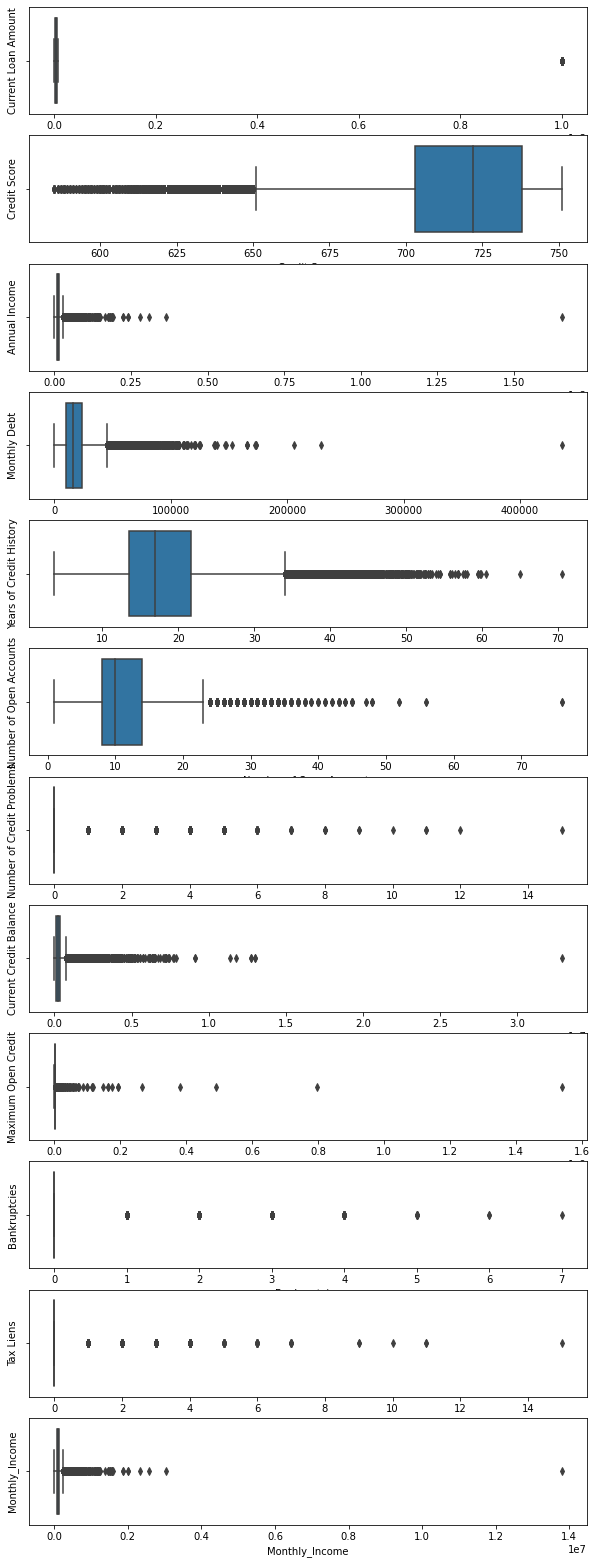

In [60]:
plt.figure(figsize=(10,35))
for i,col in enumerate(df1_num,1):
    plt.subplot(15,1,i)
    sns.boxplot(df1_num[col])
    plt.ylabel(col)
plt.show()

##### We can infer that BankRuptcies were declared highly with High Number of Credit Problems History

In [ ]:
### Insight Analysis : Checking the distribution of features 

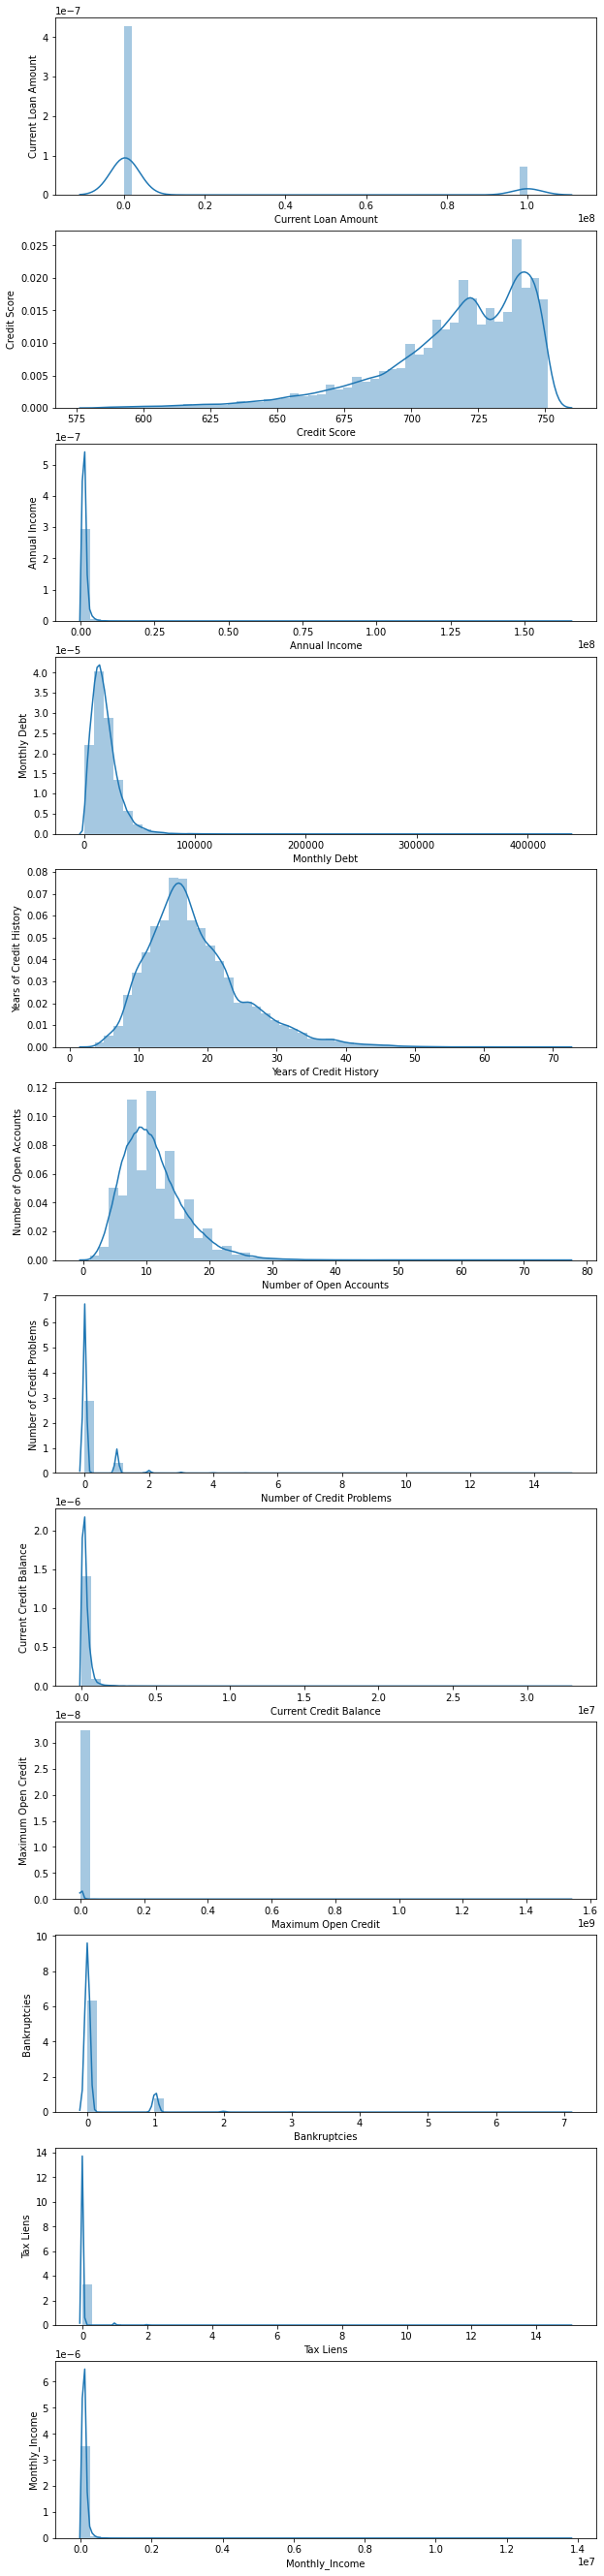

In [175]:
plt.figure(figsize=(10,60))
for i,col in enumerate(df1_num,1):
    plt.subplot(15,1,i)
    sns.distplot(df1_num[col])
    plt.ylabel(col)
plt.show()

### Multi-Variate Analysis 

In [61]:
df1.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,Mid_Level,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,Mid_Level,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,Entry_Level,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,729.0,896857.0,Senior_Level,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,Entry_Level,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [62]:
#### Insight Analysis-Checking the Correlation among features

<AxesSubplot:>

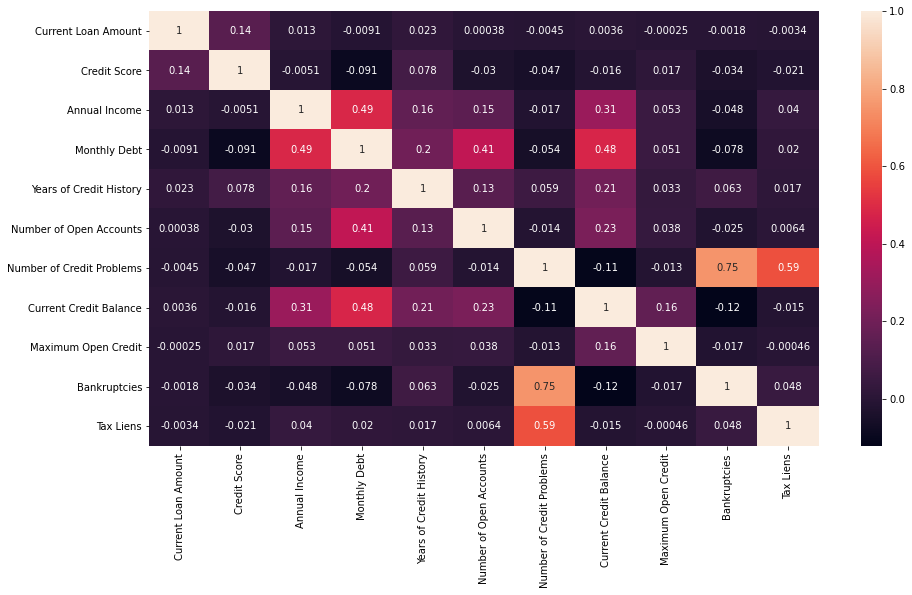

In [63]:
plt.figure(figsize=(15,8))

sns.heatmap(df1.corr(),annot=True)

#### Encoding Categorical Features

In [64]:
#Categorical Encoding 

# Selecting the categorical columns
cat = df1[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
cat = pd.get_dummies(cat,drop_first=True)

#Dropping the original Columns 

df1.drop(['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)

#Concating the Dataframe with the new One-Hot Encoded columns 

df1 = pd.concat([df1,cat], axis = 1)

In [65]:
df1['Loan Status']=df1['Loan Status'].replace({'Fully Paid':1,'Charged Off':0})

### Applying SMOTE to treat the imbalance we faced during EDA

In [66]:
X=df1.drop('Loan Status',axis=1)
y=df1['Loan Status']

In [67]:
# import library
from imblearn.over_sampling import SMOTE
counter=Counter(y)
print('Before',counter)
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

counter=Counter(y_smote)
print('After',counter)


Before Counter({1: 63512, 0: 17171})
After Counter({1: 63512, 0: 63512})


In [68]:
y_smote.value_counts()

1    63512
0    63512
Name: Loan Status, dtype: int64

In [69]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127024 entries, 0 to 127023
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Current Loan Amount                127024 non-null  float64
 1   Credit Score                       127024 non-null  float64
 2   Annual Income                      127024 non-null  float64
 3   Monthly Debt                       127024 non-null  float64
 4   Years of Credit History            127024 non-null  float64
 5   Number of Open Accounts            127024 non-null  float64
 6   Number of Credit Problems          127024 non-null  float64
 7   Current Credit Balance             127024 non-null  float64
 8   Maximum Open Credit                127024 non-null  float64
 9   Bankruptcies                       127024 non-null  float64
 10  Tax Liens                          127024 non-null  float64
 11  Term_Short Term                    1270

#### Scaling Features 

In [70]:
x_smote['Annual Income']=x_smote['Annual Income'].astype('int32')

In [71]:
x_smote['Credit Score']=x_smote['Credit Score'].astype('int32')

In [72]:
x_smote['Number of Open Accounts']=x_smote['Number of Open Accounts'].astype('int32')

In [73]:
x_smote['Number of Credit Problems']=x_smote['Number of Credit Problems'].astype('int32')

In [74]:
x_smote['Current Credit Balance']=x_smote['Current Credit Balance'].astype('int32')

In [75]:
x_smote['Maximum Open Credit']=x_smote['Maximum Open Credit'].astype('int32')

In [76]:
x_smote['Bankruptcies']=x_smote['Bankruptcies'].astype('int32')

In [77]:
x_smote['Tax Liens']=x_smote['Tax Liens'].astype('int32')

In [78]:
x_smote['Current Loan Amount']=x_smote['Current Loan Amount'].astype('int32')

In [143]:
x_smote.head()

,Number of Credit Problems,Bankruptcies,Tax Liens,Term_Short Term,Years in current job_Mid_Level,Years in current job_Senior_Level,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,...,Purpose_vacation,Purpose_wedding,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
0,2.908219,3.431690,-0.126061,0.787386,1.748755,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.242630,-0.420929,0.002436,-1.507968,0.024437,-1.198936,0.012240,-0.256281
1,2.908219,-0.291402,-0.126061,0.787386,1.748755,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,3.161166,1.169949,1.384103,1.082931,-0.389182,1.410847,0.399760,0.638385
2,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.295750,0.087964,-0.766365,-0.965922,-0.988710,-0.327404,0.176889,-0.352808
3,-0.343843,-0.291402,-0.126061,0.787386,-0.571835,1.622810,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.373970,0.482898,-0.555336,-0.015298,0.041317,-1.198936,-0.067221,-0.753793
4,2.908219,3.431690,-0.126061,0.787386,-0.571835,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.367779,0.535665,0.033385,-0.674459,0.406611,0.577931,-0.727673,-0.755266


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
minmax=MinMaxScaler()

In [82]:
scaled_features = minmax.fit_transform(x_smote[['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Current Credit Balance','Maximum Open Credit']])
scaled_features_df = pd.DataFrame(scaled_features, index=x_smote.index, columns=['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Current Credit Balance','Maximum Open Credit'])

In [83]:
x_smote.drop(['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Current Credit Balance','Maximum Open Credit'],axis=1,inplace=True)

In [84]:
x_smote=pd.concat([x_smote,scaled_features_df],axis=1)

In [142]:
x_smote.head()

,Number of Credit Problems,Bankruptcies,Tax Liens,Term_Short Term,Years in current job_Mid_Level,Years in current job_Senior_Level,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,...,Purpose_vacation,Purpose_wedding,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
0,2.908219,3.431690,-0.126061,0.787386,1.748755,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.242630,-0.420929,0.002436,-1.507968,0.024437,-1.198936,0.012240,-0.256281
1,2.908219,-0.291402,-0.126061,0.787386,1.748755,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,3.161166,1.169949,1.384103,1.082931,-0.389182,1.410847,0.399760,0.638385
2,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.295750,0.087964,-0.766365,-0.965922,-0.988710,-0.327404,0.176889,-0.352808
3,-0.343843,-0.291402,-0.126061,0.787386,-0.571835,1.622810,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.373970,0.482898,-0.555336,-0.015298,0.041317,-1.198936,-0.067221,-0.753793
4,2.908219,3.431690,-0.126061,0.787386,-0.571835,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.367779,0.535665,0.033385,-0.674459,0.406611,0.577931,-0.727673,-0.755266


In [86]:
x_smote.isnull().sum()

Number of Credit Problems            0
Bankruptcies                         0
Tax Liens                            0
Term_Short Term                      0
Years in current job_Mid_Level       0
Years in current job_Senior_Level    0
Home Ownership_Home Mortgage         0
Home Ownership_Own Home              0
Home Ownership_Rent                  0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expenses         0
Purpose_Home Improvements            0
Purpose_Medical Bills                0
Purpose_Other                        0
Purpose_Take a Trip                  0
Purpose_major_purchase               0
Purpose_moving                       0
Purpose_other                        0
Purpose_renewable_energy             0
Purpose_small_business               0
Purpose_vacation                     0
Purpose_wedding                      0
Current Loan Amount                  0
Credit Score             

In [87]:
x_smote.skew()

Number of Credit Problems              5.687044
Bankruptcies                           4.306288
Tax Liens                             17.012514
Term_Short Term                       -0.482645
Years in current job_Mid_Level         1.176934
Years in current job_Senior_Level      1.006607
Home Ownership_Home Mortgage           0.467634
Home Ownership_Own Home                3.619274
Home Ownership_Rent                    0.608586
Purpose_Buy House                     14.827637
Purpose_Buy a Car                     10.980674
Purpose_Debt Consolidation            -1.055806
Purpose_Educational Expenses          40.846156
Purpose_Home Improvements              4.807565
Purpose_Medical Bills                 11.476611
Purpose_Other                          6.641050
Purpose_Take a Trip                   16.192461
Purpose_major_purchase                21.153073
Purpose_moving                        31.831068
Purpose_other                          4.597595
Purpose_renewable_energy             125

In [88]:
from sklearn.preprocessing import PowerTransformer

In [89]:
x_smote_columns=x_smote.columns

In [90]:
power=PowerTransformer()

In [91]:
x_smote = power.fit_transform(x_smote)

In [92]:
x_smote= pd.DataFrame(x_smote,columns=x_smote_columns)

In [94]:
x_smote

,Number of Credit Problems,Bankruptcies,Tax Liens,Term_Short Term,Years in current job_Mid_Level,Years in current job_Senior_Level,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,...,Purpose_vacation,Purpose_wedding,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
0,2.908219,3.431690,-0.126061,0.787386,1.748755,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.242630,-0.420929,0.002436,-1.507968,0.024437,-1.198936,0.012240,-0.256281
1,2.908219,-0.291402,-0.126061,0.787386,1.748755,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,3.161166,1.169949,1.384103,1.082931,-0.389182,1.410847,0.399760,0.638385
2,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,-0.793157,3.877152,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.295750,0.087964,-0.766365,-0.965922,-0.988710,-0.327404,0.176889,-0.352808
3,-0.343843,-0.291402,-0.126061,0.787386,-0.571835,1.622810,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.373970,0.482898,-0.555336,-0.015298,0.041317,-1.198936,-0.067221,-0.753793
4,2.908219,3.431690,-0.126061,0.787386,-0.571835,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.367779,0.535665,0.033385,-0.674459,0.406611,0.577931,-0.727673,-0.755266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127019,-0.343843,-0.291402,-0.126061,0.787386,-0.571835,-0.616215,-0.793157,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.414308,0.379685,-0.418323,-1.420983,-0.849463,-1.897910,-1.802793,-1.768399
127020,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,1.260785,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.193254,0.134768,0.312521,1.005230,1.314323,0.157028,1.234485,0.924077
127021,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,-0.793157,-0.257921,-0.740982,-0.067138,...,-0.02398,-0.026029,-0.307303,-0.570353,-0.238142,-0.226997,-0.243893,-0.596943,-1.497069,-1.572872
127022,-0.343843,-0.291402,-0.126061,-1.270025,-0.571835,-0.616215,-0.793157,-0.257921,1.349561,-0.067138,...,-0.02398,-0.026029,-0.417445,-0.092273,-2.357364,-1.903353,-0.426787,-0.327404,-1.335602,-1.270987


# Logistic-Regression Base-Model

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X=x_smote
y=y_smote

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr=LogisticRegression()

In [100]:
lr.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred=lr.predict(X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score

In [103]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76     18988
           1       0.75      0.85      0.80     19120

    accuracy                           0.78     38108
   macro avg       0.79      0.78      0.78     38108
weighted avg       0.79      0.78      0.78     38108

[[13484  5504]
 [ 2813 16307]]


In [104]:
X_train.columns

Index(['Number of Credit Problems', 'Bankruptcies', 'Tax Liens',
       'Term_Short Term', 'Years in current job_Mid_Level',
       'Years in current job_Senior_Level', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Current Loan Amount',
       'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit'],
      dtype='object')

In [105]:
import statsmodels.api as sm
Xc=sm.add_constant(X_train)

In [106]:
model=sm.Logit(y_train,Xc).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.410135
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan Status   No. Observations:                88916
Model:                          Logit   Df Residuals:                    88883
Method:                           MLE   Df Model:                           32
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.4083
Time:                        15:33:50   Log-Likelihood:                -36468.
converged:                       True   LL-Null:                       -61632.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5831      0.033    -17.883      0.000      -0.647      -0.519
Number of Credit Problems            -0.0084      0.022     -0.388      0.698      -0.051       0.034
Bankruptcies                          0.1499      0.020      7.485      0.000       0.111       0.189
Tax Liens                             0.0057      0.011      0.501      0.616      -0.017       0.028
Term_Short Term                       0.4881      0.011     44.456      0.000       0.467       0.510
Years in current job_Mid_Level        0.3464      0.010     36.098      0.000       0.328       0.365
Years in current job_Senior_Level     0.3447      0.010     34.410      0.000       0.325       0.364
Home Ownership_Home Mortgage          2.7690      0.072     38.222      0.000       2.627       2.911
Home Ownership_Own Home               1.4576      0.037     39.616      0.000       1.385       1.530
Home Ownership_Rent                   2.6417      0.071     37.125      0.000       2.502       2.781
Purpose_Buy House                     0.2170      0.010     22.802      0.000       0.198       0.236
Purpose_Buy a Car                     0.3283      0.011     29.861      0.000       0.307       0.350
Purpose_Debt Consolidation            1.1400      0.022     52.924      0.000       1.098       1.182
Purpose_Educational Expenses          0.0848      0.010      8.744      0.000       0.066       0.104
Purpose_Home Improvements             0.5604      0.013     44.265      0.000       0.536       0.585
Purpose_Medical Bills                 0.2629      0.010     27.578      0.000       0.244       0.282
Purpose_Other                         0.4893      0.011     42.800      0.000       0.467       0.512
Purpose_Take a Trip                   0.4190      0.015     27.857      0.000       0.389       0.448
Purpose_major_purchase                0.1394      0.009     15.199      0.000       0.121       0.157
Purpose_moving                        0.0881      0.008     10.644      0.000       0.072       0.104
Purpose_other                         0.6141      0.013     48.626      0.000       0.589       0.639
Purpose_renewable_energy              0.0233      0.007      3.346      0.001       0.010       0.037
Purpose_small_business                0.0885      0.008     11.206      0.000       0.073       0.104
Purpose_vacation                      0.0743      0.008      9.535      0.000       0.059       0.090
Purpose_wedding                       0.0845      0.009      9.400      0.000       0.067       0.102
Current Loan Amount                   1.3721      0.043     32.201      0.000       1.289       1.456
Credit Score                         -0.0045      0.011     -0.410      0.682      -0.026       0.017
Annual Income                         0.4270      0.013     32.730      0.000       0.401       0.453
Monthly Debt                         -0.2928      0.014    -20.620      0.000  

# Variance Inflation Factors 

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])],index=Xc.columns,columns=['vif']).sort_values(by='vif',ascending=False)

,vif
Number of Credit Problems,5.696072
Bankruptcies,4.899847
Maximum Open Credit,3.826337
Current Credit Balance,3.668704
Monthly Debt,2.443453
Home Ownership_Home Mortgage,2.266158
Home Ownership_Rent,2.130310
Purpose_Debt Consolidation,1.991823
Annual Income,1.921722
Number of Open Accounts,1.615889


# Backward Elimination 

In [108]:
cols=list(Xc.columns)
while len(cols)>1:
    X1=Xc[cols]
    model=sm.OLS(y_train,X1).fit()
    pvalues=model.pvalues
    pvalues=pvalues.drop("const")
    max_p=max(pvalues)
    feature_maxp=pvalues.idxmax()
    if max_p>0.05:
        cols.remove(feature_maxp)
        print(feature_maxp,max_p)
    else:
        break
        
selected_features=cols
print(cols)

Credit Score 0.5618781441076417
Number of Credit Problems 0.3336534558561449
Tax Liens 0.30638947605602324
Number of Open Accounts 0.11461199031084487
['const', 'Bankruptcies', 'Term_Short Term', 'Years in current job_Mid_Level', 'Years in current job_Senior_Level', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding', 'Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Current Credit Balance', 'Maximum Open Credit']


In [109]:
Xc=sm.add_constant(X_train)
model=sm.GLM(y_train,Xc[selected_features]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan Status   No. Observations:                88916
Model:                            GLM   Df Residuals:                    88887
Model Family:                Gaussian   Df Model:                           28
Link Function:               identity   Scale:                         0.14817
Method:                          IRLS   Log-Likelihood:                -41265.
Date:                Sun, 28 Mar 2021   Deviance:                       13171.
Time:                        15:34:18   Pearson chi2:                 1.32e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.4994      0.001    386.850      0.000       0.497       0.502
Bankruptcies                          0.0259      0.001     19.318      0.000       0.023       0.029
Term_Short Term                       0.0749      0.001     54.921      0.000       0.072       0.078
Years in current job_Mid_Level        0.0620      0.001     43.160      0.000       0.059       0.065
Years in current job_Senior_Level     0.0626      0.001     41.980      0.000       0.060       0.065
Home Ownership_Home Mortgage          0.1965      0.002    101.180      0.000       0.193       0.200
Home Ownership_Own Home               0.1139      0.002     75.268      0.000       0.111       0.117
Home Ownership_Rent                   0.1776      0.002     94.243      0.000       0.174       0.181
Purpose_Buy House                     0.0263      0.001     20.313      0.000       0.024       0.029
Purpose_Buy a Car                     0.0381      0.001     28.657      0.000       0.036       0.041
Purpose_Debt Consolidation            0.1143      0.002     63.174      0.000       0.111       0.118
Purpose_Educational Expenses          0.0103      0.001      7.721      0.000       0.008       0.013
Purpose_Home Improvements             0.0637      0.002     42.319      0.000       0.061       0.067
Purpose_Medical Bills                 0.0305      0.001     22.747      0.000       0.028       0.033
Purpose_Other                         0.0586      0.001     41.982      0.000       0.056       0.061
Purpose_Take a Trip                   0.0324      0.001     24.505      0.000       0.030       0.035
Purpose_major_purchase                0.0165      0.001     12.213      0.000       0.014       0.019
Purpose_moving                        0.0102      0.001      7.830      0.000       0.008       0.013
Purpose_other                         0.0718      0.001     48.170      0.000       0.069       0.075
Purpose_renewable_energy              0.0028      0.001      2.264      0.024       0.000       0.005
Purpose_small_business                0.0083      0.001      6.463      0.000       0.006       0.011
Purpose_vacation                      0.0089      0.001      7.487      0.000       0.007       0.011
Purpose_wedding                       0.0100      0.001      7.926      0.000       0.007       0.012
Current Loan Amount                   0.0988      0.001     75.023      0.000       0.096       0.101
Annual Income                         0.0676      0.002     38.210      0.000       0.064       0.071
Monthly Debt                         -0.0437      0.002    -23.327      0.000      -0.047      -0.040
Years of Credit History              -0.0152      0.001    -10.636      0.000      -0.018      -0.012
Current Credit Balance 

In [110]:
prob=model.predict(Xc[selected_features])
prob=pd.DataFrame(prob,columns=["prob"])
prob['loan_status']=y_train
prob['y_est']=prob['prob'].apply(lambda x: 0 if x<0.5 else 1)
prob.head()

,prob,loan_status,y_est
63234,0.593425,1,1
81586,0.034118,0,0
18258,0.887232,1,1
52002,0.842704,1,1
110890,0.485081,0,0


In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(prob['loan_status'],prob['y_est'])
print(classification_report(prob['loan_status'],prob['y_est']))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77     44524
           1       0.75      0.88      0.81     44392

    accuracy                           0.79     88916
   macro avg       0.80      0.79      0.79     88916
weighted avg       0.80      0.79      0.79     88916



# Decsion Tree Base-Model

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print("Train -Confusion Matrix :\n",confusion_matrix(y_train,y_train_pred))
print("\n Train -Accuracy Score :",accuracy_score(y_train,y_train_pred))
print("\n Train -AUC : ",roc_auc_score(y_train,y_train_prob))
y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print("Test -Confusion Matrix :\n",confusion_matrix(y_test,y_test_pred))
print("\n Test -Accuracy Score :",accuracy_score(y_test,y_test_pred))
print("\n Test -AUC : ",roc_auc_score(y_test,y_test_prob))

Train -Confusion Matrix :
 [[44524     0]
 [    0 44392]]

 Train -Accuracy Score : 1.0

 Train -AUC :  1.0
Test -Confusion Matrix :
 [[14963  4025]
 [ 3845 15275]]

 Test -Accuracy Score : 0.7934816836359819

 Test -AUC :  0.7934628444038209


### Random-Forest Base Model

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Train -Confusion Matrix :\n",confusion_matrix(y_train,y_train_pred))
print("\n Train -Accuracy Score :",accuracy_score(y_train,y_train_pred))
print("\n Train -AUC : ",roc_auc_score(y_train,y_train_prob))
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Test -Confusion Matrix :\n",confusion_matrix(y_test,y_test_pred))
print("\n Test -Accuracy Score :",accuracy_score(y_test,y_test_pred))
print("\n Test -AUC : ",roc_auc_score(y_test,y_test_prob))

Train -Confusion Matrix :
 [[44524     0]
 [    0 44392]]

 Train -Accuracy Score : 1.0

 Train -AUC :  1.0
Test -Confusion Matrix :
 [[14943  4045]
 [ 1868 17252]]

 Test -Accuracy Score : 0.8448357300304398

 Test -AUC :  0.9303181848831191


# HyperParameter Tunning 

In [116]:
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [117]:
param_dist={'n_estimators':sp_randint(25,250),
            'max_features':sp_randint(1,7),
           'max_depth':sp_randint(2,15),
           'min_samples_leaf':sp_randint(1,20),
           'min_samples_split':sp_randint(2,50),
           'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,
                           scoring='roc_auc',
                              n_iter=10,cv=3,n_jobs=-1,random_state=4)
rsearch.fit(X,y)
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 4,
 'min_samples_leaf': 19,
 'min_samples_split': 17,
 'n_estimators': 123}

In [119]:
rfc = RandomForestClassifier(**rsearch.best_params_,random_state=4)# **Keyword argument

rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))

Accuracy Train: 0.8071550677043502
Confusion Matrix Train:
 [[33265 11259]
 [ 5888 38504]]
Train-AUC 0.8968647211215298


Accuracy Test: 0.792169623176236
Confusion Matrix Test:
 [[13830  5158]
 [ 2762 16358]]
Test-AUC 0.8778165057781484


In [120]:
print("Test -classification_report :\n",classification_report(y_test,y_test_pred))

Test -classification_report :
               precision    recall  f1-score   support

           0       0.83      0.73      0.78     18988
           1       0.76      0.86      0.81     19120

    accuracy                           0.79     38108
   macro avg       0.80      0.79      0.79     38108
weighted avg       0.80      0.79      0.79     38108



### AdaBoost-Classifier

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [122]:
from sklearn.ensemble import AdaBoostClassifier

adac=AdaBoostClassifier()

adac.fit(X_train,y_train)


AdaBoostClassifier()

In [123]:
y_train_pred = adac.predict(X_train)
y_train_prob = adac.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = adac.predict(X_test)
y_test_prob = adac.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))


Accuracy Train: 0.7832786000269918
Confusion Matrix Train:
 [[33765 10759]
 [ 8511 35881]]
Train-AUC 0.8764662523174794


Accuracy Test: 0.7795738427626745
Confusion Matrix Test:
 [[14334  4654]
 [ 3746 15374]]
Test-AUC 0.8719848510907131


# Lightgbm

In [124]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [125]:
import lightgbm as lgb

In [126]:
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(X_train,y_train)

LGBMClassifier(random_state=4)

In [127]:
y_train_pred = lgbmc.predict(X_train)
y_train_prob = lgbmc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = lgbmc.predict(X_test)
y_test_prob = lgbmc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))

Accuracy Train: 0.8135543659183949
Confusion Matrix Train:
 [[32876 11648]
 [ 4930 39462]]
Train-AUC 0.9045590454887429


Accuracy Test: 0.7984150309646268
Confusion Matrix Test:
 [[13706  5282]
 [ 2400 16720]]
Test-AUC 0.8876679766035893


# Hyper Parameter Tunning

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgbmc=lgb.LGBMClassifier(random_state=4)
params={'n_estimators': sp_randint(50,250),"max_depth":sp_randint(1,15),
       'min_child_samples':sp_randint(2,25),
       'learning_rate': sp_uniform(0,0.5)}
rsearch=RandomizedSearchCV(lgbmc,param_distributions=params,cv=3,
                  n_iter=100,scoring='roc_auc',random_state=4,
                  n_jobs=-1)
rsearch.fit(X,y)
rsearch.best_params_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


{'learning_rate': 0.34411063660206304,
 'max_depth': 13,
 'min_child_samples': 11,
 'n_estimators': 227}

In [137]:
lgbmc=lgb.LGBMClassifier(**rsearch.best_params_,importance_type='gain',random_state=4)
lgbmc.fit(X_train,y_train)
y_train_pred = lgbmc.predict(X_train)
y_train_prob = lgbmc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = lgbmc.predict(X_test)
y_test_prob = lgbmc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy Train: 0.854694318232939
Confusion Matrix Train:
 [[35751  8773]
 [ 4147 40245]]
Train-AUC 0.9392805510997093


Accuracy Test: 0.8115356355620867
Confusion Matrix Test:
 [[14269  4719]
 [ 2463 16657]]
Test-AUC 0.895442108669382


In [138]:
pd.DataFrame(lgbmc.feature_importances_,index=X.columns,columns=['imp']).sort_values(by='imp',ascending=False)

,imp
Current Loan Amount,29082.097591
Home Ownership_Own Home,19365.835601
Home Ownership_Rent,16625.721866
Home Ownership_Home Mortgage,10829.501545
Term_Short Term,9358.267832
Years of Credit History,6741.404396
Annual Income,6689.806013
Credit Score,6437.573266
Years in current job_Senior_Level,4382.163914
Monthly Debt,3714.057872


In [139]:
print("Test -classification_report :\n",classification_report(y_test,y_test_pred))

Test -classification_report :
               precision    recall  f1-score   support

           0       0.85      0.75      0.80     18988
           1       0.78      0.87      0.82     19120

    accuracy                           0.81     38108
   macro avg       0.82      0.81      0.81     38108
weighted avg       0.82      0.81      0.81     38108



# XGBOOST Algorithm 

In [131]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
from xgboost.sklearn import XGBClassifier

In [133]:
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)

[15:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_train_pred = xgbc.predict(X_train)
y_train_prob = xgbc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = xgbc.predict(X_test)
y_test_prob = xgbc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))

Accuracy Train: 0.87891942957398
Confusion Matrix Train:
 [[37034  7490]
 [ 3276 41116]]
Train-AUC 0.9562394028331385


Accuracy Test: 0.8189094153458591
Confusion Matrix Test:
 [[14465  4523]
 [ 2378 16742]]
Test-AUC 0.9011258913909951


In [147]:
print("Test -classification_report :\n",classification_report(y_test,y_test_pred))

Test -classification_report :
               precision    recall  f1-score   support

           0       0.86      0.76      0.81     18988
           1       0.79      0.88      0.83     19120

    accuracy                           0.82     38108
   macro avg       0.82      0.82      0.82     38108
weighted avg       0.82      0.82      0.82     38108



# Hyper Parameter Tunning

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
xgbc=XGBClassifier()
params={'n_estimators': sp_randint(50,250),"max_depth":sp_randint(1,8),
        'min_child_weight':[1,2],
       'learning_rate': sp_uniform(0,0.5),
       'gamma':sp_uniform(0,0.5)}
rsearch=RandomizedSearchCV(xgbc,param_distributions=params,cv=3,
                  n_iter=50,scoring='roc_auc',random_state=4,
                  n_jobs=-1)
rsearch.fit(X,y)
rsearch.best_params_

[16:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'gamma': 0.442898547719903,
 'learning_rate': 0.27268845750676945,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 155}

In [148]:
xgbc=XGBClassifier(**rsearch.best_params_,importance_type='gain',random_state=4)
xgbc.fit(X_train,y_train)
y_train_pred = xgbc.predict(X_train)
y_train_prob = xgbc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('Train-AUC',roc_auc_score(y_train,y_train_prob))
print('\n')
y_test_pred = xgbc.predict(X_test)
y_test_prob = xgbc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Test-AUC',roc_auc_score(y_test,y_test_prob))

[17:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Train: 0.87891942957398
Confusion Matrix Train:
 [[37034  7490]
 [ 3276 41116]]
Train-AUC 0.9562394028331385


Accuracy Test: 0.8189094153458591
Confusion Matrix Test:
 [[14465  4523]
 [ 2378 16742]]
Test-AUC 0.9011258913909951


In [141]:
print("Test -classification_report :\n",classification_report(y_test,y_test_pred))

Test -classification_report :
               precision    recall  f1-score   support

           0       0.86      0.76      0.81     18988
           1       0.79      0.88      0.83     19120

    accuracy                           0.82     38108
   macro avg       0.82      0.82      0.82     38108
weighted avg       0.82      0.82      0.82     38108



# Thank You!